<a href="https://colab.research.google.com/github/majd2003omari/loan_stuat_project/blob/main/project_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LOAD DATA

In [ ]:
import pandas as pd


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ملفات الكولاب /train_balanced.csv")
df_test=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ملفات الكولاب /test_original.csv")

In [ ]:
df.head()

,loan_int_rate,debt_to_income,person_home_ownership_MORTGAGE,person_income,loan_amnt,intent_risk_score,loan_intent_DEBTCONSOLIDATION,loan_risk_score,person_home_ownership_OWN,prev_default_flag,...,loan_intent_VENTURE,person_home_ownership_RENT,monthly_income,loan_percent_income,age_group_18-25,age_group_26-35,loan_intent_MEDICAL,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_status
0,-1.820997,-0.757761,False,-0.238051,-0.829929,-1.345975,False,-1.344872,True,0.984213,...,True,False,-0.238054,-0.842393,True,False,False,False,False,0
1,0.057799,1.214554,False,-0.701113,0.467014,-1.345975,False,1.085622,False,0.984213,...,True,True,-0.701133,1.213180,True,False,False,False,False,0
2,0.605859,-1.398358,True,2.287416,0.318388,-1.345975,False,-1.159797,False,0.984213,...,True,False,2.287367,-1.427213,False,True,False,False,False,0
3,0.856573,-0.983678,True,0.658859,-0.422565,0.951040,False,-0.627080,False,-1.016040,...,False,False,0.658881,-1.027037,False,True,True,False,False,0
4,-0.111611,-0.195980,True,0.156021,-0.016521,-0.323076,False,-0.151193,False,0.984213,...,False,False,0.156032,-0.193031,False,True,False,False,False,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   loan_int_rate                   56000 non-null  float64
 1   debt_to_income                  56000 non-null  float64
 2   person_home_ownership_MORTGAGE  56000 non-null  bool   
 3   person_income                   56000 non-null  float64
 4   loan_amnt                       56000 non-null  float64
 5   intent_risk_score               56000 non-null  float64
 6   loan_intent_DEBTCONSOLIDATION   56000 non-null  bool   
 7   loan_risk_score                 56000 non-null  float64
 8   person_home_ownership_OWN       56000 non-null  bool   
 9   prev_default_flag               56000 non-null  float64
 10  loan_to_month_income            56000 non-null  float64
 11  loan_intent_VENTURE             56000 non-null  bool   
 12  person_home_ownership_RENT      

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   loan_int_rate                   9000 non-null   float64
 1   debt_to_income                  9000 non-null   float64
 2   person_home_ownership_MORTGAGE  9000 non-null   bool   
 3   person_income                   9000 non-null   float64
 4   loan_amnt                       9000 non-null   float64
 5   intent_risk_score               9000 non-null   float64
 6   loan_intent_DEBTCONSOLIDATION   9000 non-null   bool   
 7   loan_risk_score                 9000 non-null   float64
 8   person_home_ownership_OWN       9000 non-null   bool   
 9   prev_default_flag               9000 non-null   float64
 10  loan_to_month_income            9000 non-null   float64
 11  loan_intent_VENTURE             9000 non-null   bool   
 12  person_home_ownership_RENT      90

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, make_scorer, precision_recall_curve
)

In [ ]:

X_train = df.drop("loan_status", axis=1)
y_train = df["loan_status"]
x_test=df_test.drop("loan_status", axis=1)
y_test= df_test["loan_status"]

# search the best model

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.metrics import specificity_score
import pandas as pd

models = {
    "Logistic Regression": LogisticRegression(max_iter=200, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    "k-Nearest Neighbors": KNeighborsClassifier()
}

# Define scoring metrics we want to evaluate
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score),
    'specificity': make_scorer(specificity_score)
}

# Use 5-fold Stratified Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = []

for name, model in models.items():
    scores = cross_validate(model, X_train, y_train, cv=skf, scoring=scoring)
    cv_results.append({
        'Model': name,
        'Accuracy': scores['test_accuracy'].mean(),
        'Precision': scores['test_precision'].mean(),
        'Recall': scores['test_recall'].mean(),
        'F1': scores['test_f1'].mean(),
        'AUC': scores['test_roc_auc'].mean(),
        "Specificity": scores['test_specificity'].mean()
    })

cv_df = pd.DataFrame(cv_results).sort_values(by="AUC", ascending=False)
display(cv_df)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [20:31:45] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [20:31:46] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [20:31:47] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [20:31:47] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [20:31:48] WARNING: /w

,Model,Accuracy,Precision,Recall,F1,AUC,Specificity
2,Random Forest,0.946839,0.937031,0.958071,0.947431,0.946839,0.935607
3,XGBoost,0.939589,0.931963,0.948429,0.940118,0.939589,0.930750
4,k-Nearest Neighbors,0.919857,0.886182,0.963464,0.923208,0.919857,0.876250
1,Decision Tree,0.915804,0.911685,0.920821,0.916222,0.915804,0.910786
0,Logistic Regression,0.884018,0.850213,0.932286,0.889357,0.884018,0.835750


### Summary of Model Performance

After evaluating five different classification models using Stratified 5-Fold Cross-Validation, the results show differences in performance across accuracy, precision, recall, F1-score, AUC, and specificity.  
The models were ranked based on their AUC score, as it represents the model’s overall ability to distinguish between the two classes.

| **Model**               | **Accuracy** | **Precision** | **Recall** | **F1-score** | **AUC**   | **Specificity** |
|-------------------------|-------------:|---------------:|------------:|--------------:|----------:|----------------:|
| **Random Forest**       | 0.946839     | 0.937031       | 0.958071    | 0.947431      | 0.946839  | 0.935607        |
| **XGBoost**             | 0.939589     | 0.931963       | 0.948429    | 0.940118      | 0.939589  | 0.930750        |
| **k-Nearest Neighbors** | 0.919857     | 0.886182       | 0.963464    | 0.923208      | 0.919857  | 0.876250        |
| **Decision Tree**       | 0.915804     | 0.911685       | 0.920821    | 0.916222      | 0.915804  | 0.910786        |
| **Logistic Regression** | 0.884018     | 0.850213       | 0.932286    | 0.889357      | 0.884018  | 0.835750        |

---

### Final Conclusion

The **Random Forest** model achieved the best overall performance, with:

- The highest **AUC** among all models (0.9468).  
- Balanced **precision** (0.9370) and **recall** (0.9581).  
- The strongest **F1-score** (0.9474).  
- High **specificity** (0.9356), indicating negative cases are correctly identified.

Overall, Random Forest demonstrates the most reliable and robust performance for this dataset and is selected as the primary model for further evaluation and deployment.


# Model Randomforest  without grid search

In [ ]:
rf_params = models["Random Forest"].get_params()
rf_params


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
rf_result_cross_validation= cv_df[cv_df["Model"] == "Random Forest"]
rf_result_cross_validation


,Model,Accuracy,Precision,Recall,F1,AUC,Specificity
2,Random Forest,0.946839,0.937031,0.958071,0.947431,0.946839,0.935607


In [ ]:
model=models["Random Forest"]
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve
)

from imblearn.metrics import specificity_score
# Generate predictions and probabilities
y_pred = model.predict(x_test)
y_proba = model.predict_proba(x_test)[:, 1]

# Collect main metrics
final_results_model_without = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1": f1_score(y_test, y_pred),
    "AUC": roc_auc_score(y_test, y_proba),
    "specificity": specificity_score(y_test, y_pred)
}
pd.DataFrame([final_results_model_without])

,Accuracy,Precision,Recall,F1,AUC,specificity
0,0.922,0.8013,0.863,0.831006,0.974742,0.938857


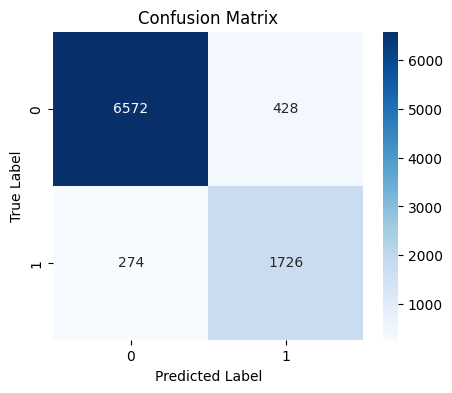

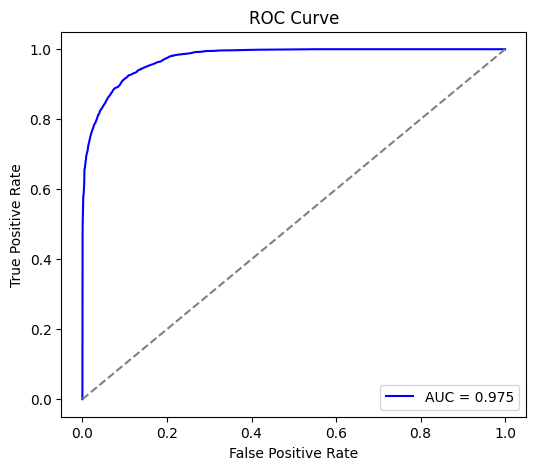

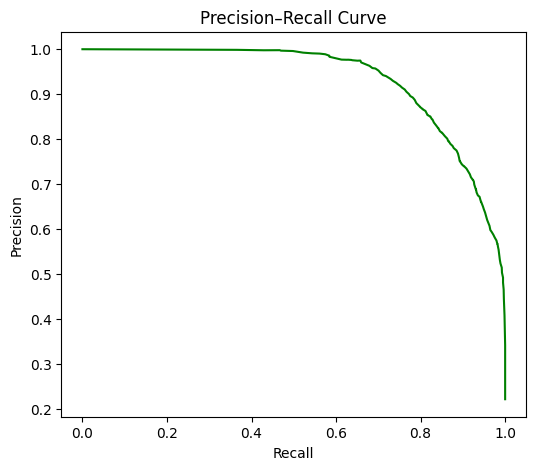

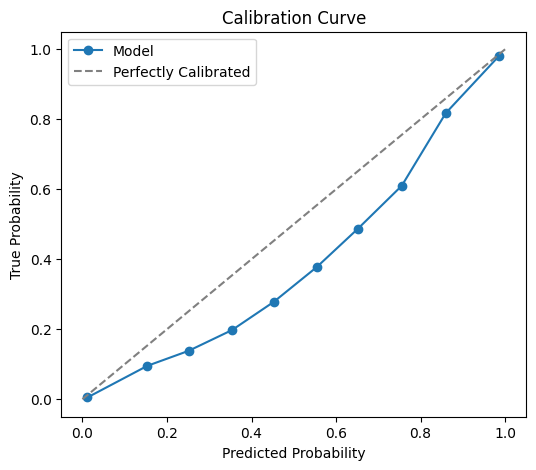

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color="blue", label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(6,5))
plt.plot(recall, precision, color="green")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.show()
from sklearn.calibration import calibration_curve

# Compute calibration values
prob_true, prob_pred = calibration_curve(y_test, y_proba, n_bins=10)

# Plot calibration curve
plt.figure(figsize=(6,5))
plt.plot(prob_pred, prob_true, marker='o', label="Model")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Perfectly Calibrated")
plt.xlabel("Predicted Probability")
plt.ylabel("True Probability")
plt.title("Calibration Curve")
plt.legend()
plt.show()


## 1. Model Parameters
The Random Forest classifier was trained using the following key parameters:

| **Parameter**         | **Value** |
| --------------------- | --------- |
| **bootstrap**         | True      |
| **criterion**         | "gini"    |
| **max_depth**         | None      |
| **max_features**      | "sqrt"    |
| **min_samples_split** | 2         |
| **min_samples_leaf**  | 1         |
| **n_estimators**      | 100       |
| **random_state**      | 42        |
| **class_weight**      | None      |
| **oob_score**         | False     |

---

## 2. Cross-Validation Performance
Using 5-fold Stratified Cross-Validation on the training set, the Random Forest achieved the following average scores:

| Metric      | Value |
|------------|-------|
| Accuracy   | 0.9468 |
| Precision  | 0.9370 |
| Recall     | 0.9581 |
| F1-score   | 0.9474 |
| AUC        | 0.9468 |
| Specificity| 0.9356 |

---

## 3. Performance on the Test Set
Evaluating the trained model on the hold-out test set:

| Metric      | Value |
|------------|-------|
| Accuracy   | 0.922 |
| Precision  | 0.8013 |
| Recall     | 0.863 |
| F1-score   | 0.8310 |
| AUC        | 0.9747 |
| Specificity| 0.9389 |

---

## 4. Performance Interpretation
The Random Forest model demonstrated strong performance:

- **Accuracy:** 92.2%, indicating reliable overall predictions.  
- **Precision:** 80.1%, showing a moderate false positive rate.  
- **Recall:** 86.3%, meaning the model captures the majority of positive cases.  
- **F1-score:** 0.831, reflecting a good balance between precision and recall.  
- **AUC:** 0.9747, demonstrating excellent class separability.  
- **Specificity:** 93.9%, confirming that negative cases are correctly identified.  

---

## 5. Conclusion
Even without hyperparameter tuning, the Random Forest model exhibited strong classification performance. Its high AUC and well-balanced metrics across precision, recall, and specificity indicate that the model is reliable, effective, and suitable for this dataset.


# Model Randomforest with grid search

In [ ]:
# Let's fine-tune Random Forest as an example
param_grid = {
    'n_estimators': [300,400,500,600],
    'max_depth': [10,15,20,25],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(
    RandomForestClassifier(n_estimators=200, random_state=42),
    param_grid,
    cv=skf,
    scoring='f1',
    n_jobs=-1
)
grid.fit(X_train, y_train)

print("Best Parameters Found:", grid.best_params_)
print("Best F1 Score During Cross-Validation:", grid.best_score_)

best_model = grid.best_estimator_

Best Parameters Found: {'max_depth': 25, 'min_samples_split': 2, 'n_estimators': 400}
Best F1 Score During Cross-Validation: 0.9478393259455938


In [ ]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.metrics import specificity_score
import pandas as pd

# Define scoring metrics for CV
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score),
    'specificity': make_scorer(specificity_score)
}

# Define skf again as it was not defined in this cell's execution context
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation on the best model
cv_results = cross_validate(
    best_model,
    X_train,
    y_train,
    cv=skf,  # same StratifiedKFold
    scoring=scoring,
    return_train_score=False
)

# Aggregate results
cv_summary = {
    "Accuracy": cv_results['test_accuracy'].mean(),
    "Precision": cv_results['test_precision'].mean(),
    "Recall": cv_results['test_recall'].mean(),
    "F1": cv_results['test_f1'].mean(),
    "AUC": cv_results['test_roc_auc'].mean(),
    "Specificity": cv_results['test_specificity'].mean()
}

# Display all metrics as a dataframe
pd.DataFrame([cv_summary])

,Accuracy,Precision,Recall,F1,AUC,Specificity
0,0.947107,0.934907,0.961143,0.947839,0.947107,0.933071


In [ ]:
# Refit the model on the entire training data using the best parameters
best_params = grid.best_params_
best_params



{'max_depth': 25, 'min_samples_split': 2, 'n_estimators': 400}

In [ ]:
best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, n_estimators=400, random_state=42)

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve
)

from imblearn.metrics import specificity_score


# Generate predictions and probabilities
y_pred = best_model.predict(x_test)
y_proba = best_model.predict_proba(x_test)[:, 1]

# Collect main metrics
final_results = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1": f1_score(y_test, y_pred),
    "AUC": roc_auc_score(y_test, y_proba),
    "specificity": specificity_score(y_test, y_pred)
}

pd.DataFrame([final_results])

,Accuracy,Precision,Recall,F1,AUC,specificity
0,0.919778,0.794742,0.8615,0.826775,0.974695,0.936429


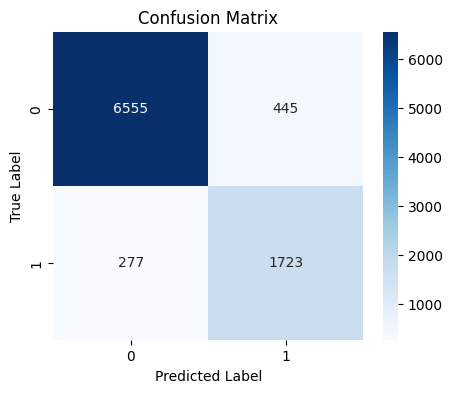

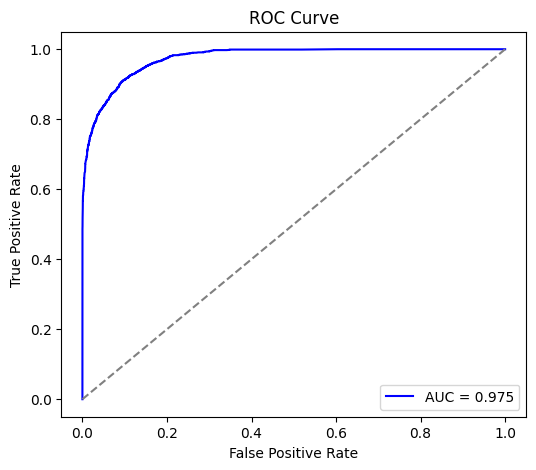

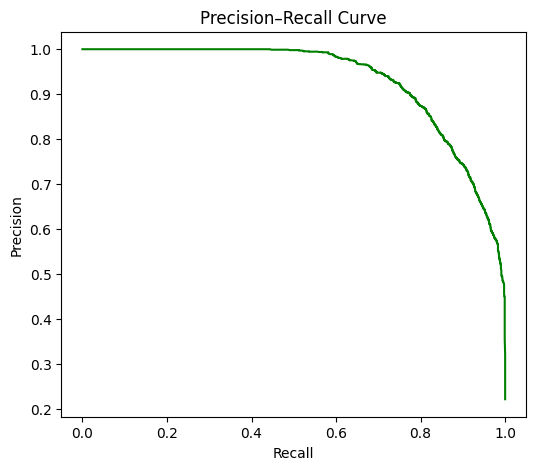

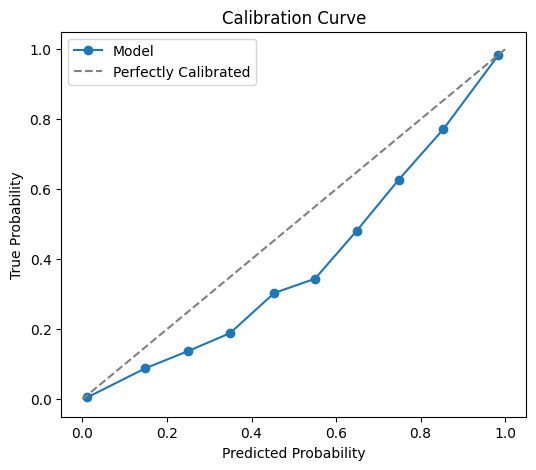

In [ ]:

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color="blue", label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(6,5))
plt.plot(recall, precision, color="green")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.show()
from sklearn.calibration import calibration_curve

# Compute calibration values
prob_true, prob_pred = calibration_curve(y_test, y_proba, n_bins=10)

# Plot calibration curve
plt.figure(figsize=(6,5))
plt.plot(prob_pred, prob_true, marker='o', label="Model")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Perfectly Calibrated")
plt.xlabel("Predicted Probability")
plt.ylabel("True Probability")
plt.title("Calibration Curve")
plt.legend()
plt.show()


## Random Forest Classifier (with Fine-Tuning)

## 1. Model Parameters
The Random Forest classifier was fine-tuned using **Grid Search**, and the best hyperparameters found were:

| Parameter         | Value |
|------------------|-------|
| n_estimators      | 400   |
| max_depth         | 25    |
| min_samples_split | 2     |
| random_state      | 42    |

Other parameters remained default:

| Parameter         | Value       |
|------------------|------------|
| bootstrap         | True       |
| criterion         | "gini"     |
| max_features      | "sqrt"     |
| min_samples_leaf  | 1          |
| class_weight      | None       |
| oob_score         | False      |

## 2. Cross-Validation Performance
Using 5-fold Stratified Cross-Validation on the training set, the fine-tuned Random Forest achieved:

| Metric       | Value    |
|-------------|---------|
| Accuracy    | 0.9471  |
| Precision   | 0.9349  |
| Recall      | 0.9611  |
| F1-score    | 0.9478  |
| AUC         | 0.9471  |
| Specificity | 0.9331  |

## 3. Performance on the Test Set
Evaluating the fine-tuned model on the hold-out test set:

| Metric       | Value    |
|-------------|---------|
| Accuracy    | 0.9198  |
| Precision   | 0.7947  |
| Recall      | 0.8615  |
| F1-score    | 0.8268  |
| AUC         | 0.9747  |
| Specificity | 0.9364  |

## 4. Performance Interpretation
The fine-tuned Random Forest model shows strong performance:

- **Accuracy**: 91.98%, reliable overall predictions.  
- **Precision**: 79.5%, moderate false positive rate.  
- **Recall**: 86.2%, captures most positive cases.  
- **F1-score**: 0.8268, good balance between precision and recall.  
- **AUC**: 0.9747, excellent class separability.  
- **Specificity**: 93.6%, negative cases are correctly identified.

## 5. Conclusion
Hyperparameter tuning using Grid Search (best parameters: `max_depth=25`, `min_samples_split=2`, `n_estimators=400`) slightly improved recall and maintained strong overall metrics.


#comparison between the Random Forest(without FT)and the Random Forest(withFT)



In [ ]:
print("____________comparison_____________")
print("RESULT Random Forest (without FT):")
print(rf_result_cross_validation)
print("RESULT Random Forest (with FT)  : ")
print(pd.DataFrame([cv_summary]))
print("____________________________________")

____________comparison_____________
RESULT Random Forest (without FT):
           Model  Accuracy  Precision    Recall        F1       AUC  \
2  Random Forest  0.946839   0.937031  0.958071  0.947431  0.946839   

   Specificity  
2     0.935607  
RESULT Random Forest (with FT)  : 
   Accuracy  Precision    Recall        F1       AUC  Specificity
0  0.947107   0.934907  0.961143  0.947839  0.947107     0.933071
____________________________________


### Fine-Tuning, Model Comparison, and Selection

In the **fine-tuning** process, we used **Grid Search** to find the best hyperparameters for a specific model, while the other model was evaluated with default settings. Both models were assessed using **5-Fold Cross-Validation**.

Based on the cross-validation results, we compared performance metrics including Accuracy, Precision, Recall, F1-score, AUC, and Specificity.

Considering our priority on detecting negative cases (Specificity) while maintaining a good balance between classes:

- **Random Forest without FT** has a slightly higher Specificity (0.9356 vs 0.9331), meaning it better identifies negative cases.
- Other metrics like Accuracy, F1-score, and AUC are very similar between the two versions.

**Conclusion:** Random Forest without FT is chosen as it maximizes Specificity while keeping strong overall performance, providing a reliable and balanced classifier.

---

### Comparison Table: Random Forest With vs Without FT

| Metric       | Without FT | With FT  |
|-------------|------------|---------|
| Accuracy    | 0.946839   | 0.947107 |
| Precision   | 0.937031   | 0.934907 |
| Recall      | 0.958071   | 0.961143 |
| F1-score    | 0.947431   | 0.947839 |
| AUC         | 0.946839   | 0.947107 |
| Specificity | 0.935607   | 0.933071 |


# Save the  appropriate model and result

In [ ]:
import joblib

# Save the chosen model
joblib.dump(model, "best_loan_stutes_model_without_ft.pkl")

print("Model saved successfully!")

Model saved successfully!


In [ ]:
import pandas as pd
# حفظ كملف CSV
rf_result_cross_validation.to_csv("random_forest_finetuned_results.csv", index=False)


In [ ]:
# Load the saved model
loaded_model = joblib.load("best_loan_stutes_model_without_ft.pkl")

# Verify it's working by making a quick prediction
sample_prediction = loaded_model.predict(x_test.iloc[:5])
print("Sample Predictions:", sample_prediction)

Sample Predictions: [0 0 0 0 1]
